<a href="https://colab.research.google.com/github/jkoks-svg/ML_Project_ENSAE/blob/main/ML_Project_ENSAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <div style="text-align:center;">
   <span style="color:green; font-size:2em; font-weight:bold;">Exploratory Data Analysis (EDA)</span><br><br>
</div>

# <span style="color:green; text-align:center;">Introduction</span>

In [30]:
# Import des packages
from importlib import reload
import declarations as d
reload(d)

<module 'declarations' from 'c:\\Users\\gnint\\OneDrive\\Bureau\\Project_ML_econometrics\\ML_Project_ENSAE\\declarations.py'>

In [16]:
# Import dataset
df=d.fetch_ucirepo(id=697) 
X=df.data.features
y = df.data.targets 
X.head(3)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74


In [29]:
# Checking for duplicates
print("Total number of duplicates in features  :",
      X[X.duplicated()].shape[0])

Total number of duplicates in features  : 0


## <span style="color:green; text-align:center;">I- Presentation of database</span>

### ## <span style="color:green; text-align:center;">I 1- Presentation of features</span>

In [25]:
# dimensions of features
X.shape

(4424, 36)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [36]:
colonnes_a_convertir = ['Marital Status', 'Application mode', 'Application order', 'Debtor',
                        'Course', 'Daytime/evening attendance', 'Previous qualification', 'Gender',
                         'Nacionality', "Mother's qualification", 'Displaced', 'Educational special needs',
                        "Father's qualification", "Mother's occupation", "Father's occupation", 
                        'Tuition fees up to date', 'Scholarship holder', 'International']

     
X[colonnes_a_convertir] = X[colonnes_a_convertir].astype('category')


C:\Users\gnint\AppData\Local\Temp\ipykernel_31908\3255104622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[colonnes_a_convertir] = X[colonnes_a_convertir].astype('category')


In [27]:
X.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


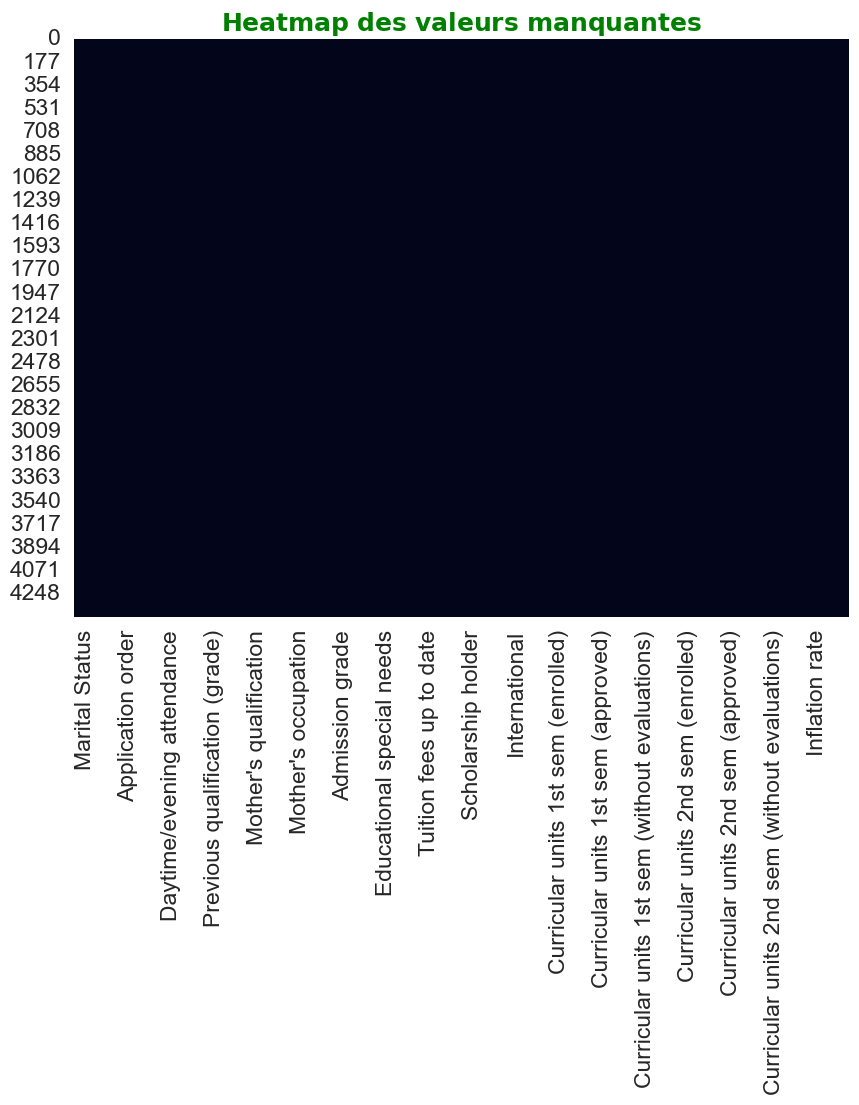

In [ ]:
# Plot Missing values
d.missing_plot(X)

### ## <span style="color:green; text-align:center;">I 2- Presentation of outcomes</span>

In [ ]:
# dimension of target
y.shape

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [ ]:
y.info()

In [21]:
d.sns.set()
colors = d.sns.color_palette()

In [22]:
d.plt.rcParams['figure.figsize'] = 10., 7.5
d.sns.set(font_scale=1.5)
d.sns.set_style('whitegrid', {'axes.spines.top': False,
                            'axes.spines.bottom': False,
                            'axes.spines.left': False,
                            'axes.spines.right': False})

In [ ]:
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

The data consists of 4424 observations and is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal. We use Target as our outcome variable, **Y**, in our analysis.

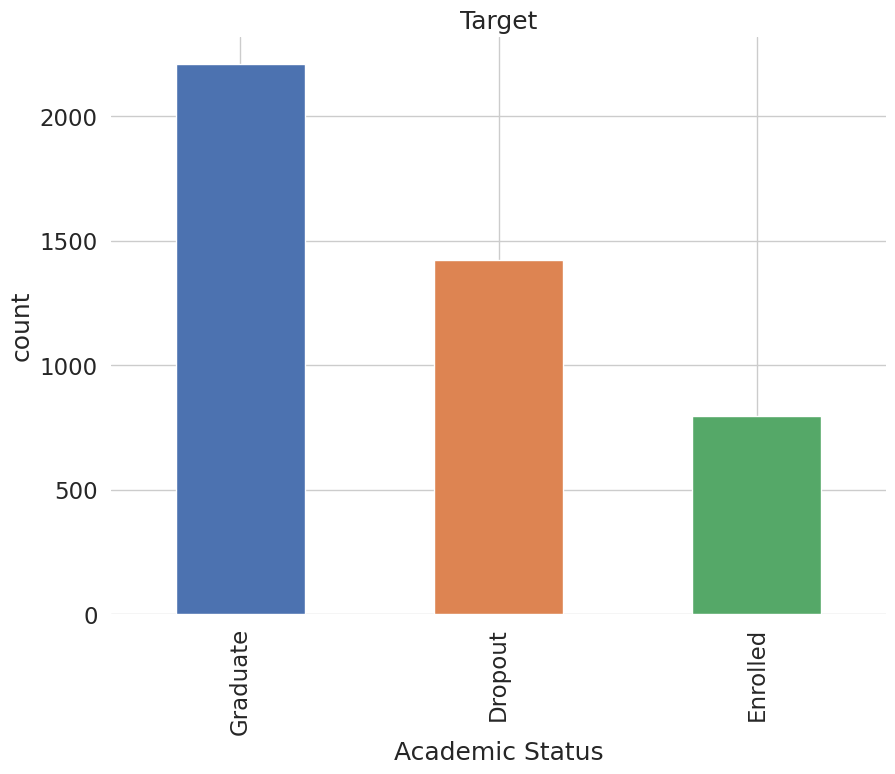

In [37]:
df['Target'].value_counts().plot(kind='bar', color=colors)
plt.title('Target')
plt.xlabel('Academic Status')
_ = plt.ylabel('count')

Dropout rates seem to be highly associated with Previous Qualification Grade, Scholarship Holder status and Gender.


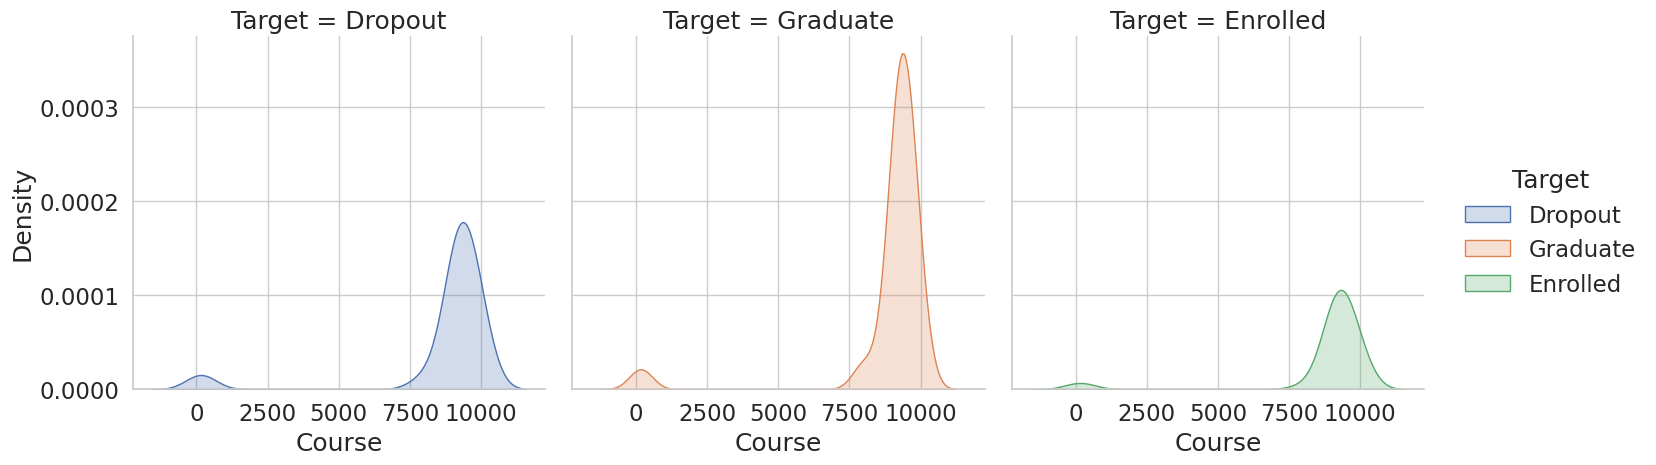

In [50]:
_ = sns.displot(df, x="Course", hue="Target", col="Target",
                kind="kde", fill=True)

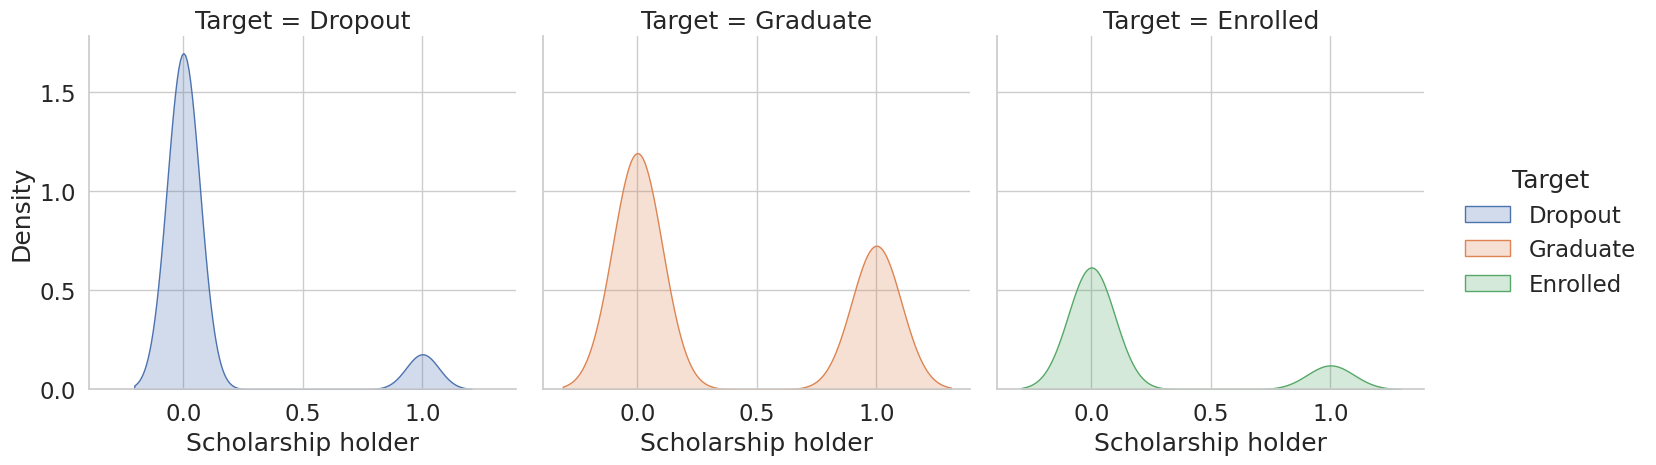

In [51]:
_ = sns.displot(df, x="Scholarship holder", hue="Target", col="Target",
                kind="kde", fill=True)

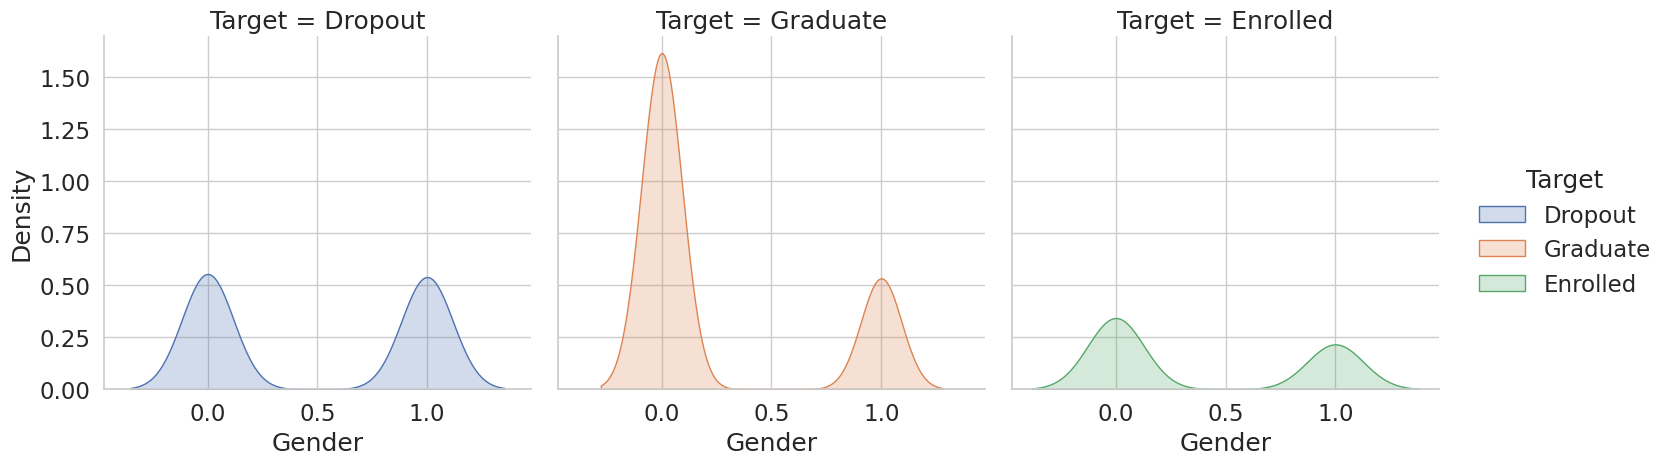

In [53]:
_ = sns.displot(df, x="Gender", hue="Target", col="Target",
                kind="kde", fill=True)